<img src="http://drive.google.com/uc?export=view&id=1tpOCamr9aWz817atPnyXus8w5gJ3mIts" width=500px>

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# Mobile Phone Review Analysis

## Context

The product companies can utilize the detailed review comments to gather insights from the end user. Most of the products are sold via e-commerce sites like Flipkart or Amazon where customers can buy a product and give their review about the product on the web site. 
Product managers can identify the relevant reviews from the website and run a sentiment analysis tool to understand what the sentiments of the customer are. Based on their sentiments, they can identify what users think of the current product. Are they happy? Discontent? 
They can also come up with a document that lists the features, the team needs to focus on for making the product better. 

## Objective

Given the review data rating label, we will try to get insights about various brands and their ratings using text analytics and build a model to predict the rating and overall sentiment. 


### Package version

- tensorflow==2.3.0
- scikit-learn==0.22.2.post1
- pandas==1.0.5
- numpy==1.18.5
- matplotlib==3.2.2
- google==2.0.3

### Data Dictionary 

product_data.csv - contains product details
- 'asin',  - Product ASIN
- 'brand', - Product Brand
- 'title', - Product Title
- 'url',  - Product URL
- 'image', - Product Image URL
- 'rating',- Product Avg. Rating
- 'reviewUrl' - Product Review Page URL
- 'totalReviews' - Product Total Reviews
- ‘price’ - Product Price ($)
- ‘originalPrice’ - Product Original Price ($)
 
reviews.csv  - contains user review details
 
- 'asin' - Product ASIN
- 'name' - Reviewer Name
- 'rating' - Reviewer Rating (scale 1 to 5)
- 'date'  - Review Date
- 'verified' - Valid Customer
- 'title'  - Review Title
- 'body'  - Review Content
- 'helpfulVotes  - Helpful Feedbacks


## Table of Content

1. Import Libraries

2. Setting options

3. Read Data

4. Data Analysis and EDA

5. Text preprocessing and Vectorization

6. Model building

7. Conclusion and Interpretation

## 1. Import Libraries

Let us start by mounting the drive

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

Let us check for the version of installed tensorflow.

In [2]:
# used to supress display of warnings
import warnings

# os is used to provide a way of using operating system dependent functionality
# We use it for setting working folder
import os

# Pandas is used for data manipulation and analysis
import pandas as pd 

# Numpy is used for large, multi-dimensional arrays and matrices, along with mathematical operators on these arrays
import numpy as np

# Matplotlib is a data visualization library for 2D plots of arrays, built on NumPy arrays 
# and designed to work with the broader SciPy stack
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot

# Seaborn is based on matplotlib, which aids in drawing attractive and informative statistical graphics.
import seaborn as sns
import tensorflow 
print(tensorflow.__version__)

2.4.1


## 2. Setting Options

In [3]:
# suppress display of warnings
warnings.filterwarnings('ignore')

# display all dataframe columns
pd.options.display.max_columns = None

# to set the limit to 3 decimals
pd.options.display.float_format = '{:.7f}'.format

# display all dataframe rows
pd.options.display.max_rows = None

## 3. Read Data

### 3.1 Read the provided CSVs and check 5 random samples and shape to understand the datasets

In [4]:
r=pd.read_csv('reviews.csv')
r.sample(n=5)

,asin,name,rating,date,verified,title,body,helpfulVotes
4251,B00A2V7BA4,Amsz zjazz x2Customer,1,"April 12, 2016",False,Don't buy a Nokia phone I'm on my 2 phone ...,Don't buy a Nokia phone I'm on my 2 phone the ...,nan
57412,B07NP6R2RG,David G. Basinski,1,"November 14, 2019",True,Forget this phone version on ATT in US,Using AT&T as a carrier. Calls do not go throu...,nan
19270,B018OMP8ES,Laurie J. Hunter,5,"June 18, 2018",True,Five Stars,Love it,nan
67060,B07XQJ33PL,kim bettencourt,1,"December 5, 2019",True,These phones do not work with straight talk.,These phones do not work with straight talk. I...,nan
5434,B00CEKXZA6,Pablo,2,"February 28, 2015",True,"Nice phone, but shipped it back","Received the phone very quickly, and had no vi...",nan


In [5]:
p=pd.read_csv('product_data.csv')
p.sample(n=5)

,asin,brand,title,url,image,rating,reviewUrl,totalReviews,price,originalPrice
656,B07VZL3L5V,Samsung,Samsung Galaxy A20 US Version Factory Unlocked...,https://www.amazon.com/Samsung-Unlocked-SM-A20...,https://m.media-amazon.com/images/I/51V-XG0uBD...,4.4000000,https://www.amazon.com/product-reviews/B07VZL3L5V,915,249.9900000,0.0000000
279,B074XF6JCD,Motorola,Motorola Moto Z2 Force XT1789 64GB ATT only (S...,https://www.amazon.com/Motorola-Force-XT1789-S...,https://m.media-amazon.com/images/I/71b9BtbvjM...,3.5000000,https://www.amazon.com/product-reviews/B074XF6JCD,20,0.0000000,0.0000000
108,B014VLTTC8,Samsung,Samsung Galaxy Mega 6.3 I527 16GB Unlocked GSM...,https://www.amazon.com/Samsung-Galaxy-Unlocked...,https://m.media-amazon.com/images/I/51b2GW++SD...,2.8000000,https://www.amazon.com/product-reviews/B014VLTTC8,32,290.0000000,399.9900000
306,B076KC34PM,Apple,"Apple iPhone 8 64GB GSM Unlocked Smartphone, R...",https://www.amazon.com/Apple-iPhone-Unlocked-S...,https://m.media-amazon.com/images/I/61XjpQucvy...,4.1000000,https://www.amazon.com/product-reviews/B076KC34PM,26,334.9800000,499.9900000
417,B07FXYRG46,Samsung,Samsung Galaxy Note 5 N920A 64GB - Gold Platin...,https://www.amazon.com/Samsung-Galaxy-Note-N92...,https://m.media-amazon.com/images/I/71SVJgTZea...,4.0000000,https://www.amazon.com/product-reviews/B07FXYRG46,12,0.0000000,0.0000000


## 4.  Data Analysis and EDA

### 4.1 Drop unnecessary columns like 'url', 'image' from the product_data

In [6]:
p.drop(columns=['url', 'image'],axis=1,inplace=True)
p.columns

Index(['asin', 'brand', 'title', 'rating', 'reviewUrl', 'totalReviews',
       'price', 'originalPrice'],
      dtype='object')

### 4.2 Check statistical summary of both datasets. Note:- Include both numerical and object type columns.

In [7]:
p.describe(include='all')

,asin,brand,title,rating,reviewUrl,totalReviews,price,originalPrice
count,720,716,720,720.0000000,720,720.0000000,720.0000000,720.0000000
unique,720,10,718,nan,720,nan,nan,nan
top,B07Y4YJ98Z,Samsung,Google Pixel 2 XL 128GB Unlocked GSM/CDMA 4G L...,nan,https://www.amazon.com/product-reviews/B078RBVVCV,nan,nan,nan
freq,1,346,2,nan,1,nan,nan,nan
mean,NaN,NaN,NaN,3.7137500,NaN,105.6791667,234.9489306,63.6907778
std,NaN,NaN,NaN,0.7160138,NaN,167.6011014,200.0084407,172.4053696
min,NaN,NaN,NaN,1.0000000,NaN,1.0000000,0.0000000,0.0000000
25%,NaN,NaN,NaN,3.3000000,NaN,7.0000000,97.5125000,0.0000000
50%,NaN,NaN,NaN,3.8000000,NaN,32.0000000,188.9750000,0.0000000
75%,NaN,NaN,NaN,4.1000000,NaN,122.2500000,336.7250000,0.0000000


In [8]:
r.describe(include='all')

,asin,name,rating,date,verified,title,body,helpfulVotes
count,67986,67984,67986.0000000,67986,67986,67972,67965,27215.0000000
unique,720,47323,nan,2983,2,41489,59811,nan
top,B00F2SKPIM,Amazon Customer,nan,"December 11, 2019",True,Five Stars,Good,nan
freq,981,6507,nan,234,61225,6043,303,nan
mean,NaN,NaN,3.8079163,NaN,NaN,NaN,NaN,8.2296895
std,NaN,NaN,1.5829058,NaN,NaN,NaN,NaN,31.9548772
min,NaN,NaN,1.0000000,NaN,NaN,NaN,NaN,1.0000000
25%,NaN,NaN,3.0000000,NaN,NaN,NaN,NaN,1.0000000
50%,NaN,NaN,5.0000000,NaN,NaN,NaN,NaN,2.0000000
75%,NaN,NaN,5.0000000,NaN,NaN,NaN,NaN,5.0000000


### 4.3 From the above statistical summary, write inferences like count of unique products, top brand, top title, range of rating, price range, etc

count of unique products=720
top brand=Samsung
top title=Apple iPhone 6S, 64GB, Rose Gold - For AT&T / ...	
range of rating=4
price range=999.99

### 4.4 Analyze the distribution of ratings and other categorical features like brand, etc

<AxesSubplot:xlabel='rating', ylabel='Density'>

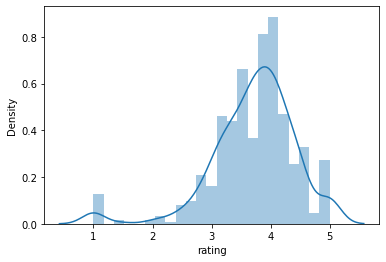

In [9]:
sns.distplot(p['rating'])

<AxesSubplot:xlabel='brand', ylabel='count'>

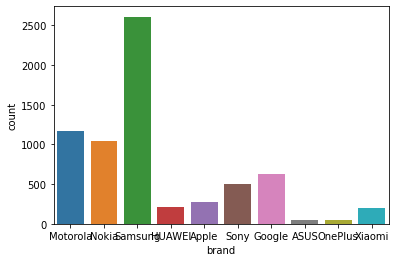

In [39]:
sns.countplot(x='brand',data=p)

### 4.5 Display average rating per brand

In [11]:
p.groupby('brand').mean('rating')

,rating,totalReviews,price,originalPrice
brand,,,,
ASUS,3.8600000,52.6000000,309.6860000,19.8500000
Apple,3.7825397,100.2380952,303.5811111,137.4820635
Google,3.7710526,111.5263158,241.8676316,162.3228947
HUAWEI,4.0218750,77.0937500,218.8290625,38.9356250
Motorola,3.6438095,89.7047619,139.1210476,57.6346667
Nokia,3.3863636,140.5000000,111.4438636,37.8818182
OnePlus,3.5800000,40.6000000,426.1960000,133.0400000
Samsung,3.6326590,108.9624277,256.5272543,43.9742486
Sony,3.7888889,122.6666667,332.7248148,87.4059259


### 4.6 Display average price per brand

### 4.7 Display average 'totalReviews' per brand

### 4.8 Merge two datasets using 'asin' and check the shape of the final dataset

In [12]:
p=p.merge(r,on='asin')
p.shape

(67986, 15)

### 4.9 Rename important features with appropriate names.
Imortant features - "rating_x": "user_rating", "title_x": "review_title", "title_y": "item_title", "rating_y": "overall_rating"

In [13]:
p=p.rename(columns={"rating_x": "user_rating", "title_x": "review_title", "title_y": "item_title", "rating_y": "overall_rating"},)


### 4.10 Select rows having verified reviews and check the shape of the final dataset

In [14]:
p=p[p['verified']==False]
p.shape

(6761, 15)

### 4.11 Check the number of reviews for various brands and report the brand that have highest number of reviews

In [15]:
p.groupby('brand').max('totalReviews')

,user_rating,totalReviews,price,originalPrice,overall_rating,verified,helpfulVotes
brand,,,,,,,
ASUS,5.0000000,155,499.0000000,99.2500000,5,False,13.0000000
Apple,5.0000000,452,949.0000000,749.9900000,5,False,146.0000000
Google,4.5000000,455,668.8000000,899.0000000,5,False,728.0000000
HUAWEI,4.6000000,602,686.9900000,749.9900000,5,False,512.0000000
Motorola,4.5000000,836,449.0000000,699.9500000,5,False,324.0000000
Nokia,4.1000000,929,499.9900000,699.0000000,5,False,279.0000000
OnePlus,4.5000000,94,645.0000000,687.9000000,5,False,107.0000000
Samsung,5.0000000,983,999.9900000,999.9900000,5,False,597.0000000
Sony,4.5000000,441,948.0000000,949.9900000,5,False,210.0000000


Samsung

### 4.12 Drop irrelevant columns and keep important features like 'brand','body','price','user_rating','review_title' for further analysis

In [16]:
p=p[['brand','body','price','user_rating','review_title' ]]
p.columns

Index(['brand', 'body', 'price', 'user_rating', 'review_title'], dtype='object')

### 4.13 Perform univariate analysis. Check distribution of price, user_rating

<AxesSubplot:xlabel='price', ylabel='Density'>

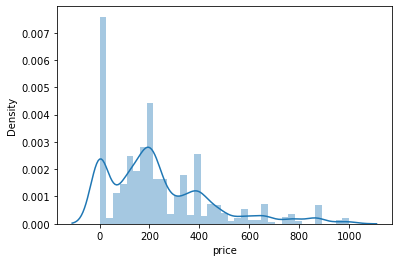

In [17]:
sns.distplot(p['price'])

<AxesSubplot:xlabel='user_rating', ylabel='Density'>

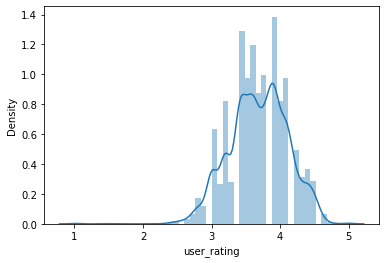

In [18]:
sns.distplot(p['user_rating'])

### 4.14 Create a new column called "sentiment". It should have value as 1 (positive) if the user_Rating is greater than 3, value as 0 (neutral) if the user_Rating == 3, and -1 (negative) is the user_Rating is less than 3.

In [19]:
c=[(p['user_rating']>3),(p['user_rating']==3),(p['user_rating']<3)]
v=[1,0,-1]
p['sentiment']=np.select(c,v)

### 4.15 Check frequency distribution of the 'sentiment'

In [20]:
p['sentiment'].value_counts()

 1    6185
 0     342
-1     234
Name: sentiment, dtype: int64

### 4.16 Perform bivariate analysis. Check correlation/crosstab between features and write your inferences.

In [21]:
p.corr()

,price,user_rating,sentiment
price,1.0000000,0.3934011,0.1197961
user_rating,0.3934011,1.0000000,0.5682841
sentiment,0.1197961,0.5682841,1.0000000


## 5. Text Preprocessing and Vectorization

We will analyze the 'body' and 'review_title' to gain more understanding.

We will ppeform the below tasks

- Convert the text into lowercase
- Remove punctuation
- Remove stopwords (English, from nltk corpus)
- Remove other keywords like "phone" and brand name

### 5.1 Change the datatype of the 'body' column to 'str' and convert it into lowercase. Print any two samples and check the output.

In [22]:
p['body'].astype('str')
p.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6761 entries, 0 to 67985
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         6708 non-null   object 
 1   body          6758 non-null   object 
 2   price         6761 non-null   float64
 3   user_rating   6761 non-null   float64
 4   review_title  6761 non-null   object 
 5   sentiment     6761 non-null   int32  
dtypes: float64(2), int32(1), object(3)
memory usage: 343.3+ KB


In [23]:
p['body']=p['body'].str.lower()
p.head(2)

,brand,body,price,user_rating,review_title,sentiment
0,NaN,i had the samsung a600 for awhile which is abs...,0.0000000,3.0000000,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,0
1,NaN,due to a software issue between nokia and spri...,0.0000000,3.0000000,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,0


### 5.2 Remove punctuations from the lowercased 'body' column and display at least two samples.

In [24]:
p['body']=p['body'].str.replace('[^\w\s]','')

In [25]:
p.sample(n=5)

,brand,body,price,user_rating,review_title,sentiment
3784,Motorola,bought this phone for my wife this weekend our...,349.9900000,3.0000000,"Motorola Droid RAZR M XT907 Verizon Wireless, ...",0
27003,Google,does it work in south korea,201.4800000,3.4000000,Google Pixel XL G2PW210032GBBK Factory Unlocke...,1
56438,Sony,i have not had a smartphone before and have be...,327.9900000,3.5000000,Sony Xperia 10 Plus GSM Unlocked Smartphone - ...,1
20216,Samsung,arrived earlynice phonebe nice to get discount...,0.0000000,3.7000000,Samsung Galaxy S4 16GB Black SPH-L720T Tri-Ban...,1
30734,Sony,this phone got a software glitch 5 days after ...,249.9900000,3.0000000,Sony Xperia XA1 G3123 32GB Unlocked GSM LTE Oc...,0


### 5.3 Remove stop words from the above pre-processed 'body' column and display at least two samples.

In [26]:
from nltk.corpus import stopwords
s=stopwords.words('english')
p['body']=p['body'].apply(lambda x:[i for i in str(x).split() if i not in s])
p.head(2)

,brand,body,price,user_rating,review_title,sentiment
0,NaN,"[samsung, a600, awhile, absolute, doo, doo, re...",0.0000000,3.0000000,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,0
1,NaN,"[due, software, issue, nokia, sprint, phones, ...",0.0000000,3.0000000,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,0


### 5.4 Apply lemmatisation on the above preprocessed text and display a few samples

In [27]:
import nltk
# t=nltk.tokenize.WhitespaceTokenizer()
l=nltk.stem.WordNetLemmatizer()
def lt(te):
    return [l.lemmatize(w) for w in te]
p['body']=p.body.apply(lt)
p.head()

,brand,body,price,user_rating,review_title,sentiment
0,NaN,"[samsung, a600, awhile, absolute, doo, doo, re...",0.0000000,3.0000000,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,0
1,NaN,"[due, software, issue, nokia, sprint, phone, t...",0.0000000,3.0000000,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,0
2,NaN,"[great, reliable, phone, also, purchased, phon...",0.0000000,3.0000000,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,0
3,NaN,"[love, phone, really, need, one, didnt, expect...",0.0000000,3.0000000,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,0
4,NaN,"[phone, great, every, purpose, offer, except, ...",0.0000000,3.0000000,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,0


### 5.5 Write a function to check word frequency of the text

In [28]:
a=[]
def f(s):
    for i in s.split():
        if i not in a:
            a.append(i)
    for i in a:
        print(i,s.count(i))

### 5.6 Check word frequency of review having top ratings (sentiment = 1) and display output of few samples

In [29]:
d=p[p['sentiment']==1]
d['review_title'][0:2].apply(f)

Motorola 1
i335 1
Cell 1
Phone 1
Boost 1
Mobile 1
Motorola 1
i335 1
Cell 1
Phone 1
Boost 1
Mobile 1


54    None
55    None
Name: review_title, dtype: object

### 5.7 Initialize tf-idf vectorizer and transform the preprocessed body text

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
v=TfidfVectorizer()
p['body']=[' '.join(i) for i in p['body'].values]
a=p['body']
x=v.fit_transform(a)

### 5.8 Segregate the data into dependent (sentiment) and independent (transformed body using tf-idf) features for building a classifier. 

In [31]:
y=p['sentiment']

### 5.9 Split the data into Train & Test Sets

In [32]:
from sklearn.model_selection import train_test_split
xt,xte,yt,yte=train_test_split(x,y)

## 6. Model building

### 6.1 Build a random forest classifier to predict the 'sentiment'
### 6.2 Predict on test set
### 6.3 Check accuracy and confusion matrix

In [33]:
from sklearn.ensemble import RandomForestClassifier
m=RandomForestClassifier()
m.fit(xt,yt)
m.predict(xte)

array([1, 1, 1, ..., 1, 1, 1])

In [34]:
m.score(xte,yte)

0.9183914843287996

In [35]:
from sklearn.metrics import confusion_matrix

In [37]:
print(confusion_matrix(yte,m.predict(xte)))

[[   1    0   56]
 [   0    4   78]
 [   1    3 1548]]


## 7. Write your conclusion

getting accuracy of 91% on test data,which is good and most of the values in confusion matrix are on the diagonal which indicates correct classification and due to severe class imbalance it has got the majority class right most of the times and misclassified the other 2 minority classes as majority class